In [66]:
# Thư viện
import numpy as np
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [67]:
# Lấy dữ liệu
# Nếu không có file Education.csv, tạo DataFrame mẫu
data = pd.DataFrame({
	'Text': ['This is good', 'Very bad', 'Excellent', 'Poor', 'Average'],
	'Label': ['positive', 'negative', 'positive', 'negative', 'positive']
})
data.head()

,Text,Label
0,This is good,positive
1,Very bad,negative
2,Excellent,positive
3,Poor,negative
4,Average,positive


In [68]:
# tạo hàm train test
def split_train_test(data, ratio_test):
    np.random.seed(00)
    index_permu = np.random.permutation(len(data))
    data_permu = data.iloc[index_permu]
    test_size = int(len(data_permu)*ratio_test)
    train_set = data_permu.iloc[:-test_size]
    test_set = data_permu.iloc[-test_size:]
    return train_set, test_set

In [69]:
train_set, test_set = split_train_test(data, 0.2)
train_set.reset_index(drop = True, inplace = True)
test_set.reset_index(drop = True, inplace = True)
print("Kích thước tập train:", len(train_set))
print("Kích thước tập train:", len(test_set))

Kích thước tập train: 4
Kích thước tập train: 1


In [70]:
X_train, y_train = train_set['Text'], train_set['Label']
X_test, y_test = test_set['Text'], test_set['Label']
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))
print(X_test)
print(y_test)

4 4
1 1
0    Average
Name: Text, dtype: object
0    positive
Name: Label, dtype: object


In [38]:
print(y_train.value_counts())
print(y_test.value_counts())

Label
positive    2
negative    2
Name: count, dtype: int64
Label
positive    1
Name: count, dtype: int64


In [39]:
# chuyển đổi positive: 1 và negative: 0
print(y_train.head())
y_train = y_train.map({"positive": 1, "negative": 0})
y_train.head()

0    positive
1    positive
2    negative
3    negative
Name: Label, dtype: object


0    1
1    1
2    0
3    0
Name: Label, dtype: int64

In [40]:
# count1: phân phối Bernoulli --> cài tham số binary: True
count1 = CountVectorizer(binary = True, stop_words = 'english') # dùng bộ lọc trong tiếng anh
count1.fit(X_train)
X_train = count1.transform(X_train)
print(X_train.toarray())
print(X_train.toarray().shape)

[[0 1 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 0 1]]
(4, 4)


In [41]:
# xem tên các đặc trưng
get_name = count1.get_feature_names_out()
print(get_name)
print(len(get_name)) 

['bad' 'excellent' 'good' 'poor']
4


In [11]:
bernoulli = BernoulliNB()
model1 = bernoulli.fit(X_train, y_train)

In [12]:
# chuyển đổi X_test về ma trận trước khi dự đoán
# lưu ý: biến đổi dựa trên các đặc trưng của count 1
X_test = count1.transform(X_test)
print(X_test.toarray())
print(X_test.shape)

[[0 0 0 0]]
(1, 4)


In [13]:
y_pred = model1.predict(X_test)
y_pred_proba = model1.predict_proba(X_test)
print(y_pred)
print(y_pred_proba)
y_pred_trans = np.where(y_pred == 0, "negative", "positive")
print(y_pred_trans)

[0]
[[0.5 0.5]]
['negative']


In [14]:
list(zip(y_pred_trans, y_test))

[(np.str_('negative'), 'positive')]

In [15]:
# có 4 độ đo phổ biến cho bài toán phân loại: accuracy, precision, recall, F1 score

In [16]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred_trans)
print(confusion)

[[0 0]
 [1 0]]


In [17]:
# đối chiếu với lý thuyết ta thấy: TN = 2, FP = 4, FN = 0, TP = 4
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]
print(TN, FP, FN, TP)

0 0 1 0


In [19]:
accuracy = (TP + TN)/len(y_pred_trans)
precision = TP/(TP + FP)
recall = TP/(TP + FN)
f1_score = round(2*(precision*recall)/(precision + recall), 2)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Accuracy: 0.0
Precision: nan
Recall: 0.0
F1-score: nan


C:\Users\DELL\AppData\Local\Temp\ipykernel_23124\1112712016.py:2: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP/(TP + FP)


In [20]:
# hàm xem nhanh các độ đo
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_trans))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       0.0
    positive       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [21]:
# đường cong ROC, AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label = 'positive')
# diện tích dưới đường cong ROC
auc = auc(fpr, tpr)
print(auc)

nan


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:1192: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


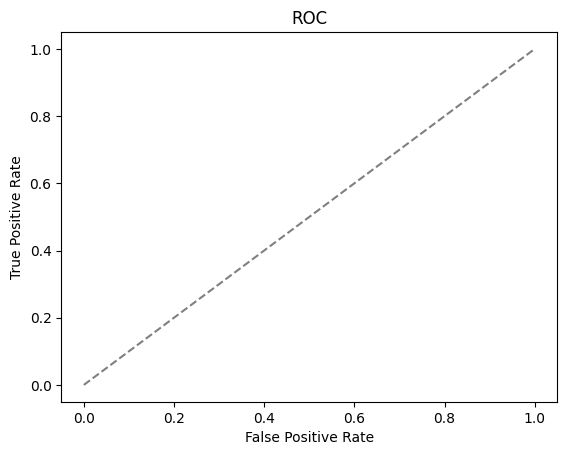

In [23]:
# vẽ đường cong ROC
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot([0, 1], [0, 1], linestyle = '--', color = 'gray')
plt.plot(fpr, tpr, marker = '.', color = 'green')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.show()

In [31]:
# 1) Lấy lại văn bản gốc
X_train_text = train_set['Text']      # luôn là chuỗi
X_test_text  = test_set['Text']

# 2) Vector hoá cho MultinomialNB
count2 = CountVectorizer(stop_words='english')
X_train_multi = count2.fit_transform(X_train_text)   # fit + transform
X_test_multi  = count2.transform(X_test_text)

# 3) Huấn luyện & dự đoán
multinomial = MultinomialNB()
model2 = multinomial.fit(X_train_multi, y_train)     # y_train đã map 0/1
y_pred_multi = model2.predict(X_test_multi)
y_pred_proba_multi = model2.predict_proba(X_test_multi)

# 4) Chuyển về nhãn chữ
y_pred_trans_multi = np.where(y_pred_multi == 0, "negative", "positive")

# 5) Đánh giá
from sklearn.metrics import classification_report
print("Kết quả MultinomialNB:")
print(classification_report(y_test, y_pred_trans_multi))

print("\nSo sánh hai mô hình:")
print("BernoulliNB prediction :", y_pred_trans)
print("MultinomialNB prediction:", y_pred_trans_multi)


Kết quả MultinomialNB:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       0.0
    positive       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


So sánh hai mô hình:
BernoulliNB prediction : ['negative']
MultinomialNB prediction: ['negative']


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [ ]:
import joblib, pathlib, datetime as _dt

# thư mục artefacts_ex1
out_dir = pathlib.Path("artefacts_ex1")
out_dir.mkdir(exist_ok=True)

# lưu vectorizer & model đã huấn luyện
joblib.dump(count1, out_dir / "vectorizer.pkl")
joblib.dump(model1, out_dir / "model.pkl")

print(f"[{_dt.datetime.now():%H:%M:%S}] artefacts_ex1 saved at", out_dir.resolve())


[22:05:34] artefacts_ex1 saved at D:\Zalo Received Files\Nộp\Nộp\sentiment_drug_app_fixed\artefacts_ex1
